# Workflow
1. Define Problem
2. Load Data
3. Data Cleaning
4. Modeling Building
5. Build VoteClassifier
6. Evaluation
7. Pickle the best Classifier
8. Conclusion


## 1. Define Problem
> Predict the pitch_name based on release_speed, release_pos_x, release_pos_z, release_spin_rate, (optional: balls and strikes)

In [24]:
# data manipulation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Machine Learning
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

## 2. Load Data

In [25]:
df = pd.read_csv("statcast_2017.csv")

pitch_name     
4-Seam Fastball    0.347745
Slider             0.162316
2-Seam Fastball    0.129517
Changeup           0.099332
Sinker             0.078767
Curveball          0.078671
Cutter             0.053005
Knuckle Curve      0.029668
Split-Finger       0.016476
Knuckleball        0.003685
Forkball           0.000344
Eephus             0.000258
Pitch Out          0.000162
Screwball          0.000054
dtype: float64


<AxesSubplot:xlabel='pitch_name'>

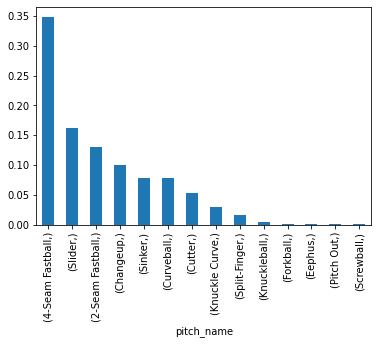

In [26]:
print(df[['pitch_name']].value_counts(normalize= True))
df[['pitch_name']].value_counts(normalize= True).plot(kind = 'bar')

From above we can see 14 types of pitch. For more accurate result, we drop 5 infrequent types, Knuckleball, Forkball, Eephus, Pitch Out and Screwball

## 3. Data Cleaning

In [27]:
# get rid of Knuckleball, Forkball, Eephus, Pitch Out and Screwball
def filter_rows_by_values(df, col, values):
    return df[~df[col].isin(values)]
values = ['Knuckleball','Forkball','Eephus','Pitch Out','Screwball']
print(f'size before removing row {df.shape}')
df = filter_rows_by_values(df,'pitch_name', values)
print(f'size after removing row {df.shape}')

size before removing row (721244, 93)
size after removing row (718011, 93)


In [28]:
# choose the columns that we chose earlier in the meeting
df_pca = df[['pitch_name','release_speed', 'release_pos_x', 'release_pos_z', 'release_spin_rate']]

In [29]:
# drop all the null values before running PCA
print(f"size before droping null values {df_pca.shape}")
df_pca = df_pca.dropna()
print(f"size after droping null values {df_pca.shape}")

size before droping null values (718011, 5)
size after droping null values (702344, 5)


In [30]:
# Choose 1,000 samples and run PCA to see whether there are clusters
df_pca = df_pca.sample(n=1000, random_state=1)
df_pca_X = df_pca.drop('pitch_name',axis = 1)

pca = PCA(n_components=2)
components = pca.fit_transform(df_pca_X)

In [31]:
print(pca.explained_variance_ratio_)

[9.99592937e-01 3.65809978e-04]


In [33]:
components[:,0]
fig = px.scatter(components, x=components[:,0], y=components[:,1], color = df_pca.pitch_name, hover_name = df_pca.pitch_name)
fig.show()

In [16]:
# ANOVA feature selection for numeric input and categorical output



(100, 2)


In [19]:
# define feature selection
fs = SelectKBest(score_func=f_classif, k=2)
# apply feature selection
X = df
y = df.pitch_name
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(100, 20)

In [36]:
X = df.select_dtypes(include=np.number)

In [37]:
X = X.dropna(thresh=X.shape[0]*0.6,how='all',axis=1)

In [42]:
X.drop(['Unnamed: 0','batter', 'pitcher'], axis = 1)

Index(['Unnamed: 0', 'release_speed', 'release_pos_x', 'release_pos_z',
       'batter', 'pitcher', 'zone', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'outs_when_up', 'inning', 'fielder_2',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'effective_speed', 'release_spin_rate', 'release_extension', 'game_pk',
       'pitcher.1', 'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5',
       'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'at_bat_number', 'pitch_number', 'home_score', 'away_score',
       'bat_score', 'fld_score', 'post_away_score', 'post_home_score',
       'post_bat_score', 'post_fld_score', 'spin_axis', 'delta_home_win_exp',
       'delta_run_exp'],
      dtype='object')